In [53]:
import pandas as pd
import simfin as sf
import numpy as np
%matplotlib inline

In [2]:
sf.set_data_dir('~/Data/')

In [3]:
sf.set_api_key(api_key='free')

In [33]:
%%time
market = 'us'
df_income = sf.load_income(variant='quarterly', market=market)
df_bal_sheet =sf.load_balance(variant='quarterly', market=market)

Dataset "us-income-quarterly" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-balance-quarterly" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
CPU times: user 1.16 s, sys: 158 ms, total: 1.31 s
Wall time: 3.64 s


In [34]:
tickers = ["LUV","DAL","UAL"]
df_bal_sheet.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2010-07-31      45846      USD         2010            Q3   2010-10-06   
       2010-10-31      45846      USD         2010            Q4   2010-12-20   
       2011-01-31      45846      USD         2011            Q1   2011-03-09   
       2011-04-30      45846      USD         2011            Q2   2011-06-07   
       2011-07-31      45846      USD         2011            Q3   2011-09-07   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2010-07-31     2010-10-06     347000000.0       352000000.0   
       2010-10-31     2011-12-16     344000000.0       356000000.0   
       2011-01-31     2011-03-09     347000000.0       355000000.0   
       2011-04-30     2011-06-07     347000000.0       355000000.0   
       2011-07-31     2011-09-07     348000000.0       357000000.0   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Report Date                                                    
A      2010-07-31                                      2.317000e+09   
       2010-10-31                                      2.649000e+09   
       2011-01-31                                      2.638000e+09   
       2011-04-30                                      2.975000e+09   
       2011-07-31                                      3.101000e+09   

                    Accounts & Notes Receivable  ...  Short Term Debt  \
Ticker Report Date                               ...                    
A      2010-07-31                   790000000.0  ...     1.501000e+09   
       2010-10-31                   869000000.0  ...     1.501000e+09   
       2011-01-31                   854000000.0  ...     1.000000e+06   
       2011-04-30                   918000000.0  ...     0.000000e+00   
       2011-07-31                   917000000.0  ...     0.000000e+00   

                    Total Current Liabilities  Long Term Debt  \
Ticker Report Date                                              
A      2010-07-31                  2917000000    2.177000e+09   
       2010-10-31                  3083000000    2.190000e+09   
       2011-01-31                  1406000000    2.138000e+09   
       2011-04-30                  1592000000    2.144000e+09   
       2011-07-31                  1505000000    2.168000e+09   

                    Total Noncurrent Liabilities  Total Liabilities  \
Ticker Report Date                                                    
A      2010-07-31                   3.373000e+09         6290000000   
       2010-10-31                   3.377000e+09         6460000000   
       2011-01-31                   3.299000e+09         4705000000   
       2011-04-30                   3.096000e+09         4688000000   
       2011-07-31                   3.048000e+09         4553000000   

                    Share Capital & Additional Paid-In Capital  \
Ticker Report Date                                               
A      2010-07-31                                 7.861000e+09   
       2010-10-31                                 7.910000e+09   
       2011-01-31                                 8.066000e+09   
       2011-04-30                                 8.146000e+09   
       2011-07-31                                 8.254000e+09   

                    Treasury Stock  Retained Earnings  Total Equity  \
Ticker Report Date                                                    
A      2010-07-31    -7.986000e+09       3.152000e+09  2.810000e+09   
       2010-10-31    -8.038000e+09       3.444000e+09  3.236000e+09   
       2011-01-31    -8.308000e+09       3.637000e+09  3.339000e+09   
       2011-04-30    -8.308000e+09       3.837000e+09  3.961000e+09   
       2011-07-31    -8.500000e+09       4.167000e+09  4.200000e+09   

                    Total Liabilitie

In [35]:
airline_income_df=df_income.loc[tickers].reset_index()
airline_balsheet_df=df_bal_sheet.loc[tickers].reset_index()

In [37]:
airline_balsheet_df.columns

Index(['Ticker', 'Report Date', 'SimFinId', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity'],
      dtype='object')

In [38]:
airline_income_df.columns

Index(['Ticker', 'Report Date', 'SimFinId', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')

In [39]:
airline_ratios=pd.DataFrame()

In [43]:
airline_ratios=airline_balsheet_df[['Ticker','Report Date','Fiscal Year','Fiscal Period','Cash, Cash Equivalents & Short Term Investments']]

In [49]:
#calculating Balance Sheet Ratio
airline_balsheet_df['Quick Ratio']=(airline_balsheet_df['Total Current Assets']-airline_balsheet_df['Inventories'])/airline_balsheet_df['Total Current Liabilities']
airline_balsheet_df['Current Ratio']=airline_balsheet_df['Total Current Assets']/airline_balsheet_df['Total Current Liabilities']
airline_balsheet_df['Debt-to-Equity Ratio']=airline_balsheet_df['Total Liabilities']/airline_balsheet_df['Total Equity']
airline_balsheet_df['Long Term Debt-to-Equity Ratio']=airline_balsheet_df['Long Term Debt']/airline_balsheet_df['Total Equity']
airline_balsheet_df['Short Term Debt-to-Equity Ratio']=airline_balsheet_df['Short Term Debt']/airline_balsheet_df['Total Equity']

In [50]:
#calculating income statement ratios
airline_income_df["Gross Profit Margin"]=airline_income_df['Gross Profit']/airline_income_df['Revenue']
airline_income_df["Net Profit Margin"]=airline_income_df['Net Income']/airline_income_df['Revenue']
airline_income_df["Operating Margin"]=airline_income_df['Operating Income (Loss)']/airline_income_df['Revenue']
airline_income_df['EPS']=airline_income_df['Net Income']/airline_income_df['Shares (Basic)']
airline_income_df['Interest Coverage Ratio']=airline_income_df['Net Income']/airline_income_df['Shares (Basic)']


In [51]:
airline_balsheet_df.head()

,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,Quick Ratio,Current Ratio,Debt-to-Equity Ratio,Long Term Debt-to-Equity Ratio,Short Term Debt-to-Equity Ratio
0,LUV,2008-12-31,205563,USD,2008,Q4,2009-02-02,2010-01-29,739000000.0,749000000.0,...,2.023000e+09,-1.005000e+09,4.919000e+09,4.953000e+09,14068000000,0.873129,0.945474,1.840299,0.706239,0.032909
1,LUV,2009-03-31,205563,USD,2009,Q1,2009-04-29,2009-04-29,740000000.0,740000000.0,...,2.027000e+09,-9.960000e+08,4.819000e+09,4.928000e+09,14179000000,0.904579,0.959334,1.877232,0.699472,0.033076
2,LUV,2009-06-30,205563,USD,2009,Q2,2009-10-22,2009-10-22,741000000.0,741000000.0,...,2.031000e+09,-9.860000e+08,4.900000e+09,5.148000e+09,14027000000,0.943286,1.008475,1.724747,0.636752,0.020396
3,LUV,2009-09-30,205563,USD,2009,Q3,2009-10-23,2009-10-23,742000000.0,742000000.0,...,2.034000e+09,-9.780000e+08,4.876000e+09,5.217000e+09,14100000000,0.969246,1.034061,1.702703,0.647499,0.037953
4,LUV,2009-12-31,205563,USD,2009,Q4,2010-01-29,2011-02-08,741000000.0,741000000.0,...,2.024000e+09,-9.630000e+08,4.971000e+09,5.454000e+09,14269000000,1.164007,1.246011,1.616245,0.609644,0.034837


In [52]:
airline_income_df.head()

,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Gross Profit Margin,Net Profit Margin,Operating Margin,EPS,Interest Coverage Ratio
0,LUV,2008-12-31,205563,USD,2008,Q4,2009-02-02,2011-02-08,739000000.0,749000000.0,...,26000000.0,-57000000,NaN,-57000000,-57000000,0.208196,-0.020856,0.025613,-0.077131,-0.077131
1,LUV,2009-03-31,205563,USD,2009,Q1,2009-04-29,2010-04-26,740000000.0,740000000.0,...,16000000.0,-91000000,NaN,-91000000,-91000000,0.181587,-0.038608,-0.021213,-0.122973,-0.122973
2,LUV,2009-06-30,205563,USD,2009,Q2,2009-10-22,2010-08-02,741000000.0,741000000.0,...,-16000000.0,91000000,NaN,91000000,91000000,0.233563,0.034786,0.047018,0.122807,0.122807
3,LUV,2009-09-30,205563,USD,2009,Q3,2009-10-23,2010-10-28,742000000.0,742000000.0,...,4000000.0,-16000000,NaN,-16000000,-16000000,0.190548,-0.006002,0.008252,-0.021563,-0.021563
4,LUV,2009-12-31,205563,USD,2009,Q4,2010-01-29,2012-02-09,741000000.0,741000000.0,...,-69000000.0,115000000,NaN,115000000,115000000,0.246404,0.042420,0.061601,0.155196,0.155196


<AxesSubplot:>

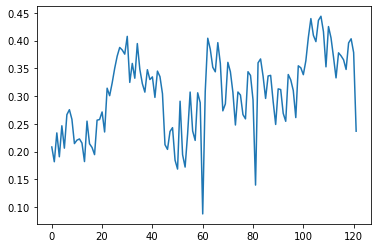

In [54]:
airline_income_df["Gross Profit Margin"].plot()

In [55]:
airlines_ratios=pd.concat([airline_income_df[['Ticker',],airline_balsheet_df],axis='columns',join='inner')

In [57]:
airlines_income_df.columns

Index(['Ticker', 'Report Date', 'SimFinId', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income', 'Net Income (Common)',
       'Gross Profit Margin', 'Net Profit Margin', 'Operating Margin', 'EPS',
       'Interest Coverage Ratio', 'Ticker', 'Report Date', 'SimFinId',
       'Currency', 'Fiscal Year', 'Fiscal Period', 'Publish Date',
       'Restated Date', 'Shares (Basic)', 'Shares (Diluted)',
       'Cash,